# `Project Title - Dynamic Pricing Strategy`

In today’s competitive fitness industry, optimizing revenue while maintaining customer satisfaction is a key challenge. CultFit, a leading fitness and wellness brand, offers a variety of fitness classes across multiple locations. These classes vary in terms of activity type, timing, and demand, presenting a unique opportunity for applying dynamic pricing strategies.

This project aims to develop a data-driven pricing model that adjusts class prices based on real-time demand, time of day, and geographical location. Traditional flat-rate pricing fails to capture the fluctuations in consumer interest, often leading to either underutilized sessions or lost revenue opportunities during peak hours. By leveraging historical booking data, we can uncover patterns in customer behavior and implement intelligent pricing that aligns with demand trends.

Through exploratory analysis, feature engineering, and regression modeling, this study will predict demand for individual sessions and recommend optimal pricing. The ultimate goal is to empower CultFit with a flexible pricing strategy that enhances operational efficiency, customer access, and overall profitability.

# `Dataset Description`

### `Overview`
The dataset contains detailed information about fitness classes conducted across multiple locations during the months of April, May, and June 2018. The data captures key operational and booking details for each class, enabling analysis of customer demand, revenue generation, and class occupancy trends.

### `Data Source`
The dataset is divided into two separate files:

Classes April-May 2018.csv

Classes June 2018.csv

Each file contains records of individual fitness classes conducted at various sites.

### `Features of the Dataset`

### `Column Name	Description`
`ActivitySiteID`	Unique ID representing the location/site of the class

`ActivityDescription`	Name and time of the fitness class (e.g., Yoga, Zumba, etc.)

`BookingEndDateTime`	Date of the class conducted

`BookingStartTime`	Start time of the class

`MaxBookees`	Maximum capacity allowed for the class

`Number Booked `	Actual number of participants who booked the class

`Price (INR)`	Price charged per participant for the class (in Indian Rupees)

### `Size of the Dataset`

File Name	Number of Records	Missing Values
April-May 2018	2177 rows	18 missing price values
June 2018	1112 rows	No missing values

### `Data Type Summary`

`Categorical Data:` ActivitySiteID, ActivityDescription, BookingEndDateTime, BookingStartTime

`Numerical Data:` MaxBookees, Number Booked, Price (INR)

# Importing Library

In [50]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Handling date and time
import datetime as dt

# Splitting data into train and test sets
from sklearn.model_selection import train_test_split

# Machine Learning Model - Random Forest
from sklearn.ensemble import RandomForestRegressor  # For Regression
from sklearn.ensemble import RandomForestClassifier # For Classification

# Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [51]:
#Load Data
df1 = pd.read_csv(r"C:\Users\shree\Downloads\Classes June 2018.csv", encoding = 'ISO-8859-1')
df2 = pd.read_csv(r"C:\Users\shree\Downloads\Classes April-May 2018.csv", encoding = 'ISO-8859-1')

# Data  Merging

In [52]:
final_df = pd.concat([df1, df2], ignore_index=True)

In [53]:
final_df.head()

,ActivitySiteID,ActivityDescription,BookingEndDateTime (Month / Day / Year),BookingStartTime,MaxBookees,Number Booked,Price (INR)
0,BRP,20:20:20 9.30-10.30am,01-Jun-18,9:30:00,35,28,499.0
1,BRP,20:20:20 9.30-10.30am,08-Jun-18,9:30:00,35,35,499.0
2,BRP,20:20:20 9.30-10.30am,15-Jun-18,9:30:00,35,31,499.0
3,BRP,20:20:20 9.30-10.30am,22-Jun-18,9:30:00,35,32,499.0
4,BRP,20:20:20 9.30-10.30am,29-Jun-18,9:30:00,35,19,499.0


In [54]:
final_df.shape

(3289, 7)

In [55]:
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MaxBookees,3289.0,32.179386,15.092156,2.0,24.0,30.0,35.0,70.0
Number Booked,3289.0,17.088781,9.504098,1.0,10.0,16.0,24.0,64.0
Price (INR),3271.0,1852.714460,792.636673,499.0,1299.0,1499.0,2499.0,3999.0


# Data Cleaning And Preprocessing

In [56]:
final_df.drop_duplicates(inplace=True)

In [57]:
print(final_df.isnull().sum())

ActivitySiteID                              0
ActivityDescription                         0
BookingEndDateTime (Month / Day / Year)     0
BookingStartTime                            0
MaxBookees                                  0
Number Booked                               0
Price (INR)                                18
dtype: int64


In [58]:
final_df.dropna(subset = 'Price (INR)', inplace = True)

In [59]:
print(final_df.dtypes)

ActivitySiteID                              object
ActivityDescription                         object
BookingEndDateTime (Month / Day / Year)     object
BookingStartTime                            object
MaxBookees                                   int64
Number Booked                                int64
Price (INR)                                float64
dtype: object


# Data Standerdize Formats
we need to convert object in to date time format for the column 'BookingEndDateTime (Month / Day / Year)' & 'BookingStartTime
extracting Year, Month, Day, Weekday

we need to convert object in to date time format for the column 'BookingEndDateTime (Month / Day / Year)' & 'BookingStartTime'

In [75]:
# Extract Date Features
# Convert Date column
final_df['BookingEndDateTime (Month / Day / Year)'] = pd.to_datetime(final_df['BookingEndDateTime (Month / Day / Year)'], dayfirst=True)
# Convert BookingStartTime to datetime
final_df['BookingStartTime'] = pd.to_datetime(final_df['BookingStartTime'], format='%H:%M:%S')

# Extract Hour
final_df['Hour'] = final_df['BookingStartTime'].dt.hour

# Extract Year, Month, Day, Weekday
final_df['Year'] = final_df['BookingEndDateTime (Month / Day / Year)'].dt.year
final_df['Month'] = final_df['BookingEndDateTime (Month / Day / Year)'].dt.month
final_df['Day'] = final_df['BookingEndDateTime (Month / Day / Year)'].dt.day
final_df['Weekday'] = final_df['BookingEndDateTime (Month / Day / Year)'].dt.day_name()


# Scaling Numerical Feature

In [76]:
from sklearn.preprocessing import StandardScaler
Numerical_column = ['MaxBookees', 'Number Booked', 'Price (INR)']

Scaler = StandardScaler()
# Fit And Transform The Numerical Columns
scaled_value = Scaler.fit_transform(final_df[Numerical_column])

In [77]:
print(scaled_value)

[[ 0.18358278  1.14296422 -1.70812363]
 [ 0.18358278  1.87872997 -1.70812363]
 [ 0.18358278  1.4582924  -1.70812363]
 ...
 [ 1.83712189  2.19405815  0.18458382]
 [ 1.83712189  2.29916754  0.18458382]
 [ 1.83712189  2.50938632  0.18458382]]


# Data Consistency

In [78]:
# Clean The Text Field
final_df['ActivitySiteID'] =  final_df['ActivitySiteID'].str.strip().str.lower()
final_df['ActivityDescription'] =  final_df['ActivityDescription'].str.strip().str.lower()

In [79]:
final_df.head()

,ActivitySiteID,ActivityDescription,BookingEndDateTime (Month / Day / Year),BookingStartTime,MaxBookees,Number Booked,Price (INR),Hour,Year,Month,Day,Weekday,class
0,brp,20:20:20 9.30-10.30am,2018-06-01,1900-01-01 09:30:00,35,28,499.0,9,2018,6,1,Friday,20:20:20
1,brp,20:20:20 9.30-10.30am,2018-06-08,1900-01-01 09:30:00,35,35,499.0,9,2018,6,8,Friday,20:20:20
2,brp,20:20:20 9.30-10.30am,2018-06-15,1900-01-01 09:30:00,35,31,499.0,9,2018,6,15,Friday,20:20:20
3,brp,20:20:20 9.30-10.30am,2018-06-22,1900-01-01 09:30:00,35,32,499.0,9,2018,6,22,Friday,20:20:20
4,brp,20:20:20 9.30-10.30am,2018-06-29,1900-01-01 09:30:00,35,19,499.0,9,2018,6,29,Friday,20:20:20


In [80]:
import re
def split_activity_description(ActivityDescription):
    ActivityDescription = ActivityDescription.strip()  # Remove leading and trailing whitespace
    # Regular expression to find time ranges (e.g., "6.00-7.00pm")
    match = re.search(r'\b\d{1,2}[:.]\d{2}\s*-\s*\d{1,2}[:.]\d{2}(?:am|pm)?\b', ActivityDescription, re.IGNORECASE)
    if match:
        time = match.group(0)
        class_name = ActivityDescription.replace(time, '').strip()
        return pd.Series([class_name, time])
    else:
        return pd.Series([ActivityDescription, None])

In [81]:
final_df[['class', 'class_time']] = final_df['ActivityDescription'].apply(split_activity_description)

In [82]:
final_df.head()

,ActivitySiteID,ActivityDescription,BookingEndDateTime (Month / Day / Year),BookingStartTime,MaxBookees,Number Booked,Price (INR),Hour,Year,Month,Day,Weekday,class,class_time
0,brp,20:20:20 9.30-10.30am,2018-06-01,1900-01-01 09:30:00,35,28,499.0,9,2018,6,1,Friday,20:20:20,9.30-10.30am
1,brp,20:20:20 9.30-10.30am,2018-06-08,1900-01-01 09:30:00,35,35,499.0,9,2018,6,8,Friday,20:20:20,9.30-10.30am
2,brp,20:20:20 9.30-10.30am,2018-06-15,1900-01-01 09:30:00,35,31,499.0,9,2018,6,15,Friday,20:20:20,9.30-10.30am
3,brp,20:20:20 9.30-10.30am,2018-06-22,1900-01-01 09:30:00,35,32,499.0,9,2018,6,22,Friday,20:20:20,9.30-10.30am
4,brp,20:20:20 9.30-10.30am,2018-06-29,1900-01-01 09:30:00,35,19,499.0,9,2018,6,29,Friday,20:20:20,9.30-10.30am


In [83]:
(final_df.isnull().sum() / len(final_df)) * 100

ActivitySiteID                              0.000000
ActivityDescription                         0.000000
BookingEndDateTime (Month / Day / Year)     0.000000
BookingStartTime                            0.000000
MaxBookees                                  0.000000
Number Booked                               0.000000
Price (INR)                                 0.000000
Hour                                        0.000000
Year                                        0.000000
Month                                       0.000000
Day                                         0.000000
Weekday                                     0.000000
class                                       0.000000
class_time                                 31.152553
dtype: float64

 Class_time is not required us so we drop column "Class_time"

In [84]:
final_df = final_df.drop(columns = ["class_time"])

In [85]:
# Analyze Demand
location_demand = final_df.groupby(['ActivitySiteID']).size().reset_index(name='Bookings')
print(location_demand)

  ActivitySiteID  Bookings
0            brp       727
1            hxp       771
2            nbl       529
3            sbp       731
4            tsc       513


In [86]:
class_demand = final_df.groupby(['ActivityDescription']).size().reset_index(name='Bookings')
print(class_demand)


         ActivityDescription  Bookings
0    20-20-20  2.45pm-3.45pm         8
1       20-20-20 7.00-8.00pm        13
2      20-20-20 9.30-10.30am        26
3         20:20:20  10-11 am        13
4    20:20:20  10.00-11.00am        11
..                       ...       ...
275      zumba 6.00 - 7.00pm         2
276        zumba 6.15-7.15pm        13
277       zumba 9.30-10.30am        13
278   zumba gold 1.45-2.45pm        13
279  zumba gold 12.45-1.45pm        13

[280 rows x 2 columns]


In [87]:
final_df.to_csv("cultfitcleaned.csv", index = False)

# Features Visualisation

## Booking per Day

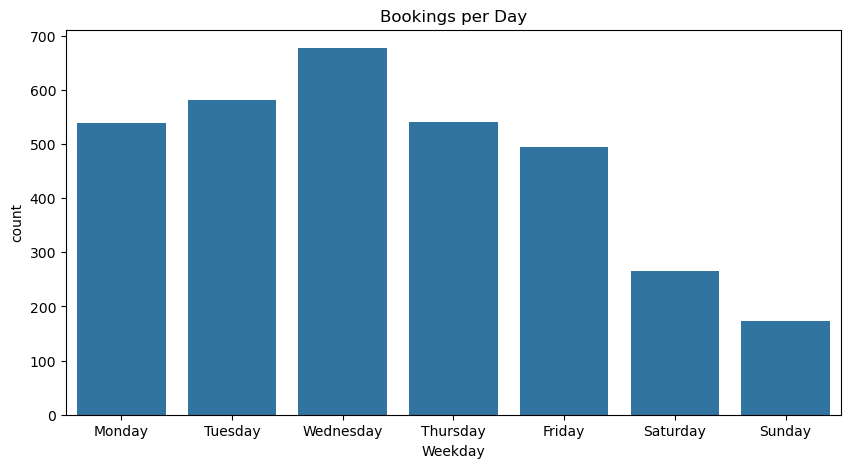

In [88]:
plt.figure(figsize=(10,5))
sns.countplot(data=final_df, x='Weekday', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Bookings per Day')
plt.show()

## Booking Per Hour

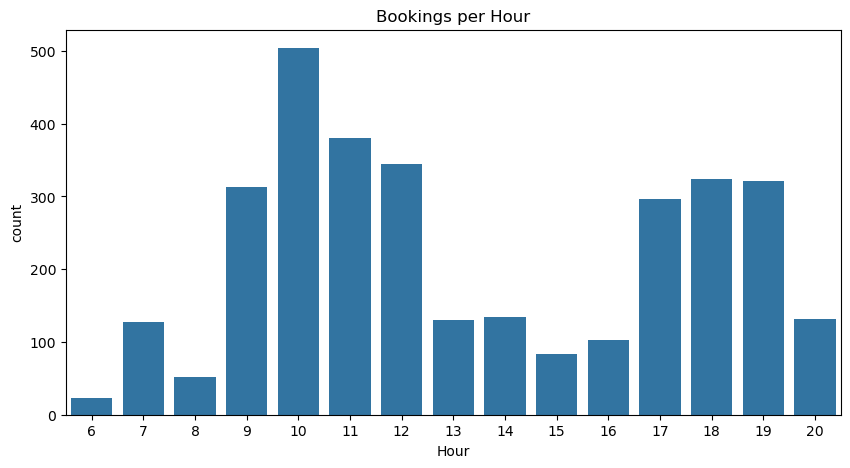

In [89]:
plt.figure(figsize=(10,5))
sns.countplot(data=final_df, x='Hour')
plt.title('Bookings per Hour')
plt.show()